In [ ]:
# NOTE: credit goes to https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# though network size and epochs differ, this code is based on Pytorch's classifier tutorial

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])
    ])

batch_size = 4

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

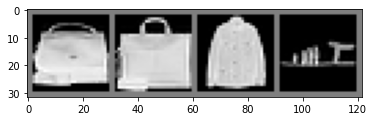

torch.Size([1, 28, 28])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(images[0].size())

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(400, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.297
[1,  4000] loss: 0.678
[1,  6000] loss: 0.578
[1,  8000] loss: 0.524
[1, 10000] loss: 0.497
[1, 12000] loss: 0.476
[1, 14000] loss: 0.459
[2,  2000] loss: 0.414
[2,  4000] loss: 0.398
[2,  6000] loss: 0.406
[2,  8000] loss: 0.395
[2, 10000] loss: 0.376
[2, 12000] loss: 0.361
[2, 14000] loss: 0.354
[3,  2000] loss: 0.341
[3,  4000] loss: 0.343
[3,  6000] loss: 0.325
[3,  8000] loss: 0.328
[3, 10000] loss: 0.333
[3, 12000] loss: 0.318
[3, 14000] loss: 0.307
[4,  2000] loss: 0.291
[4,  4000] loss: 0.304
[4,  6000] loss: 0.306
[4,  8000] loss: 0.304
[4, 10000] loss: 0.287
[4, 12000] loss: 0.296
[4, 14000] loss: 0.293
Finished Training


In [ ]:
PATH = './fashion_mnist_lenet3x3.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()

net.load_state_dict(torch.load('fashion_mnist_lenet3x3.pth'))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by r`unning images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class T-shirt is: 74.6 %
Accuracy for class Trouser is: 96.9 %
Accuracy for class Pullover is: 75.9 %
Accuracy for class Dress is: 87.2 %
Accuracy for class Coat  is: 72.0 %
Accuracy for class Sandal is: 98.1 %
Accuracy for class Shirt is: 77.8 %
Accuracy for class Sneaker is: 83.4 %
Accuracy for class Bag   is: 88.9 %
Accuracy for class Ankle Boot is: 90.8 %


In [ ]:
import torch.nn.utils.prune as prune
import torch.nn.functional as F

parameters_to_prune = (
    (net.conv1, 'weight'),
    (net.conv2, 'weight'),
    (net.fc1, 'weight'),
    (net.fc2, 'weight'),
    (net.fc3, 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.6,
)

In [ ]:
print(dict(net.named_buffers()).keys())
print(
    "Sparsity in conv1.weight: {:.2f}%".format(
        100. * float(torch.sum(net.conv1.weight == 0))
        / float(net.conv1.weight.nelement())
    )
)
print(
    "Sparsity in conv2.weight: {:.2f}%".format(
        100. * float(torch.sum(net.conv2.weight == 0))
        / float(net.conv2.weight.nelement())
    )
)
print(
    "Sparsity in fc1.weight: {:.2f}%".format(
        100. * float(torch.sum(net.fc1.weight == 0))
        / float(net.fc1.weight.nelement())
    )
)
print(
    "Sparsity in fc2.weight: {:.2f}%".format(
        100. * float(torch.sum(net.fc2.weight == 0))
        / float(net.fc2.weight.nelement())
    )
)
print(
    "Sparsity in fc3.weight: {:.2f}%".format(
        100. * float(torch.sum(net.fc3.weight == 0))
        / float(net.fc3.weight.nelement())
    )
)
print(
    "Global sparsity: {:.2f}%".format(
        100. * float(
            torch.sum(net.conv1.weight == 0)
            + torch.sum(net.conv2.weight == 0)
            + torch.sum(net.fc1.weight == 0)
            + torch.sum(net.fc2.weight == 0)
            + torch.sum(net.fc3.weight == 0)
        )
        / float(
            net.conv1.weight.nelement()
            + net.conv2.weight.nelement()
            + net.fc1.weight.nelement()
            + net.fc2.weight.nelement()
            + net.fc3.weight.nelement()
        )
    )
)

dict_keys(['conv1.weight_mask', 'conv2.weight_mask', 'fc1.weight_mask', 'fc2.weight_mask', 'fc3.weight_mask'])
Sparsity in conv1.weight: 16.67%
Sparsity in conv2.weight: 34.03%
Sparsity in fc1.weight: 88.78%
Sparsity in fc2.weight: 69.80%
Sparsity in fc3.weight: 36.90%
Global sparsity: 84.00%


In [ ]:
import argparse
import copy
import os
import sys
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import os
import torchvision.utils as vutils
import seaborn as sns
import torch.nn.init as init
import pickle

class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(64*14*14, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

def weight_init(m):
    if isinstance(m, nn.Conv1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.BatchNorm1d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm3d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)
        init.normal_(m.bias.data)
    elif isinstance(m, nn.LSTM):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.LSTMCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRU):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRUCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
# Function to make an empty mask of the same size as the model
def make_mask(model):
    global step
    global mask
    step = 0
    for name, param in model.named_parameters(): 
        if 'weight' in name:
            step = step + 1
    mask = [None]* step 
    step = 0
    for name, param in model.named_parameters(): 
        if 'weight' in name:
            tensor = param.data.cpu().numpy()
            mask[step] = np.ones_like(tensor)
            step = step + 1
    step = 0

#ANCHOR Print table of zeros and non-zeros count
def print_nonzeros(model):
    nonzero = total = 0
    for name, p in model.named_parameters():
        tensor = p.data.cpu().numpy()
        nz_count = np.count_nonzero(tensor)
        total_params = np.prod(tensor.shape)
        nonzero += nz_count
        total += total_params
        print(f'{name:20} | nonzeros = {nz_count:7} / {total_params:7} ({100 * nz_count / total_params:6.2f}%) | total_pruned = {total_params - nz_count :7} | shape = {tensor.shape}')
    print(f'alive: {nonzero}, pruned : {total - nonzero}, total: {total}, Compression rate : {total/nonzero:10.2f}x  ({100 * (total-nonzero) / total:6.2f}% pruned)')
    return (round((nonzero/total)*100,1))

def original_initialization(mask_temp, initial_state_dict):
    global model
    
    step = 0
    for name, param in model.named_parameters(): 
        if "weight" in name: 
            weight_dev = param.device
            param.data = torch.from_numpy(mask_temp[step] * initial_state_dict[name].cpu().numpy()).to(weight_dev)
            step = step + 1
        if "bias" in name:
            param.data = initial_state_dict[name]
    step = 0

# Function for Training
def train(model, train_loader, optimizer, criterion):
    EPS = 1e-6
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.train()
    for batch_idx, (imgs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        #imgs, targets = next(train_loader)
        imgs, targets = imgs.to(device), targets.to(device)
        output = model(imgs)
        train_loss = criterion(output, targets)
        train_loss.backward()

        # Freezing Pruned weights by making their gradients Zero
        for name, p in model.named_parameters():
            if 'weight' in name:
                tensor = p.data.cpu().numpy()
                grad_tensor = p.grad.data.cpu().numpy()
                grad_tensor = np.where(tensor < EPS, 0, grad_tensor)
                p.grad.data = torch.from_numpy(grad_tensor).to(device)
        optimizer.step()
    return train_loss.item()

# Function for Testing
def test(model, test_loader, criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1]  # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)
        accuracy = 100. * correct / len(test_loader.dataset)
    return accuracy

# Prune by Percentile module
def prune_by_percentile(percent, resample=False, reinit=False,**kwargs):
        global step
        global mask
        global model

        # Calculate percentile value
        step = 0
        for name, param in model.named_parameters():

            # We do not prune bias term
            if 'weight' in name:
                tensor = param.data.cpu().numpy()
                alive = tensor[np.nonzero(tensor)] # flattened array of nonzero values
                percentile_value = np.percentile(abs(alive), percent)

                # Convert Tensors to numpy and calculate
                weight_dev = param.device
                new_mask = np.where(abs(tensor) < percentile_value, 0, mask[step])
                
                # Apply new weight and mask
                param.data = torch.from_numpy(tensor * new_mask).to(weight_dev)
                mask[step] = new_mask
                step += 1
        step = 0

In [ ]:
traindataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testdataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(traindataset, batch_size=4, shuffle=True, num_workers=2, drop_last=False)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=4, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
pruningPercent = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)

model.apply(weight_init)
initial_state_dict = copy.deepcopy(model.state_dict())
torch.save(model.state_dict(), './lotto_init.pth')
make_mask(model)
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-4)
criterion = nn.CrossEntropyLoss() # Default was F.nll_loss
# Layer Looper
for name, param in model.named_parameters():
    print(name, param.size())

# Pruning
# NOTE First Pruning Iteration is of No Compression
bestacc = 0.0
best_accuracy = 0
ITERATION = 21
comp = np.zeros(ITERATION,float)
bestacc = np.zeros(ITERATION,float)
step = 0
all_loss = np.zeros(2,float)
all_accuracy = np.zeros(2,float)
ITE=1

for _ite in range(0, ITERATION):
    if not _ite == 0:
        prune_by_percentile(pruningPercent, resample=False, reinit=False)
        original_initialization(mask, initial_state_dict)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
    print(f"\n--- Pruning Level [{ITE}:{_ite}/{ITERATION}]: ---")

    # Print the table of Nonzeros in each layer
    comp1 = print_nonzeros(model)
    comp[_ite] = comp1
    pbar = tqdm(range(2))

    for iter_ in pbar:

        # Frequency for Testing
        if iter_ % 1 == 0:
            accuracy = test(model, testloader, criterion)

            # Save Weights
            if accuracy > best_accuracy:
                best_accuracy = accuracy
        # Training
        loss = train(model, trainloader, optimizer, criterion)
        all_loss[iter_] = loss
        all_accuracy[iter_] = accuracy
        
        # Frequency for Printing Accuracy and Loss
        if iter_ % 1 == 0:
            pbar.set_description(
                f'Train Epoch: {iter_}/{2} Loss: {loss:.6f} Accuracy: {accuracy:.2f}% Best Accuracy: {best_accuracy:.2f}%')       

    bestacc[_ite]=best_accuracy
    
torch.save(model.state_dict(), './pretrained_final.pth')

features.0.weight torch.Size([64, 1, 3, 3])
features.0.bias torch.Size([64])
features.2.weight torch.Size([64, 64, 3, 3])
features.2.bias torch.Size([64])
classifier.0.weight torch.Size([256, 12544])
classifier.0.bias torch.Size([256])
classifier.2.weight torch.Size([256, 256])
classifier.2.bias torch.Size([256])
classifier.4.weight torch.Size([10, 256])
classifier.4.bias torch.Size([10])

--- Pruning Level [1:0/4]: ---
features.0.weight    | nonzeros =     576 /     576 (100.00%) | total_pruned =       0 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =   36864 /   36864 (100.00%) | total_pruned =       0 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros = 3211263 / 3211264 (100.00%) | total_pruned =       1 | shape = (256, 12544)
classifier.0.bias    | nonzeros =    

Train Epoch: 1/2 Loss: 1.033249 Accuracy: 80.61% Best Accuracy: 80.61%: 100%|██████████| 2/2 [12:11<00:00, 365.94s/it]



--- Pruning Level [1:1/4]: ---
features.0.weight    | nonzeros =     240 /     576 ( 41.67%) | total_pruned =     336 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =   15343 /   36864 ( 41.62%) | total_pruned =   21521 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros = 1336534 / 3211264 ( 41.62%) | total_pruned = 1874730 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =   27276 /   65536 ( 41.62%) | total_pruned =   38260 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =    1066 /    2560 ( 41.64%) | total_pruned =    1494 | shape = (10, 256)
classi

Train Epoch: 1/2 Loss: 0.040147 Accuracy: 81.09% Best Accuracy: 81.09%: 100%|██████████| 2/2 [12:38<00:00, 379.14s/it]



--- Pruning Level [1:2/4]: ---
features.0.weight    | nonzeros =     100 /     576 ( 17.36%) | total_pruned =     476 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =    6386 /   36864 ( 17.32%) | total_pruned =   30478 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros =  556265 / 3211264 ( 17.32%) | total_pruned = 2654999 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =   11352 /   65536 ( 17.32%) | total_pruned =   54184 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =     444 /    2560 ( 17.34%) | total_pruned =    2116 | shape = (10, 256)
classi

Train Epoch: 1/2 Loss: 0.292664 Accuracy: 72.75% Best Accuracy: 81.09%: 100%|██████████| 2/2 [12:11<00:00, 365.63s/it]



--- Pruning Level [1:3/4]: ---
features.0.weight    | nonzeros =      42 /     576 (  7.29%) | total_pruned =     534 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =    2658 /   36864 (  7.21%) | total_pruned =   34206 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros =  231517 / 3211264 (  7.21%) | total_pruned = 2979747 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =    4725 /   65536 (  7.21%) | total_pruned =   60811 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =     185 /    2560 (  7.23%) | total_pruned =    2375 | shape = (10, 256)
classi

Train Epoch: 1/2 Loss: 0.303522 Accuracy: 64.56% Best Accuracy: 81.09%: 100%|██████████| 2/2 [11:55<00:00, 357.63s/it]


In [ ]:
print_nonzeros(model)
accuracy = test(model, testloader, criterion)

print(f'Accuracy: {accuracy:.2f}%')

torch.save(model.state_dict(), './pruned_final.pth')

features.0.weight    | nonzeros =      42 /     576 (  7.29%) | total_pruned =     534 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =    2658 /   36864 (  7.21%) | total_pruned =   34206 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros =  231517 / 3211264 (  7.21%) | total_pruned = 2979747 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =    4725 /   65536 (  7.21%) | total_pruned =   60811 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =     185 /    2560 (  7.23%) | total_pruned =    2375 | shape = (10, 256)
classifier.4.bias    | nonzeros =     

In [ ]:
prune_by_percentile(pruningPercent, resample=False, reinit=False)
original_initialization(mask, initial_state_dict)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
print(f"\n--- Pruning Level [{ITE}:{_ite}/{ITERATION}]: ---")

# Print the table of Nonzeros in each layer
comp1 = print_nonzeros(model)
comp[_ite] = comp1
pbar = tqdm(range(2))

for iter_ in pbar:

    # Frequency for Testing
    if iter_ % 1 == 0:
        accuracy = test(model, testloader, criterion)

        # Save Weights
        if accuracy > best_accuracy:
            best_accuracy = accuracy
    # Training
    loss = train(model, trainloader, optimizer, criterion)
    all_loss[iter_] = loss
    all_accuracy[iter_] = accuracy
    
    # Frequency for Printing Accuracy and Loss
    if iter_ % 1 == 0:
        pbar.set_description(
            f'Train Epoch: {iter_}/{2} Loss: {loss:.6f} Accuracy: {accuracy:.2f}% Best Accuracy: {best_accuracy:.2f}%')       

bestacc[_ite]=best_accuracy


--- Pruning Level [1:3/4]: ---
features.0.weight    | nonzeros =      18 /     576 (  3.12%) | total_pruned =     558 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =    1106 /   36864 (  3.00%) | total_pruned =   35758 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros =   96357 / 3211264 (  3.00%) | total_pruned = 3114907 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =    1967 /   65536 (  3.00%) | total_pruned =   63569 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =      77 /    2560 (  3.01%) | total_pruned =    2483 | shape = (10, 256)
classi

Train Epoch: 1/2 Loss: 2.519364 Accuracy: 10.00% Best Accuracy: 81.09%: 100%|██████████| 2/2 [11:34<00:00, 347.24s/it]


In [ ]:
print_nonzeros(model)
accuracy = test(model, testloader, criterion)

print(f'Accuracy: {accuracy:.2f}%')

features.0.weight    | nonzeros =      18 /     576 (  3.12%) | total_pruned =     558 | shape = (64, 1, 3, 3)
features.0.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
features.2.weight    | nonzeros =    1106 /   36864 (  3.00%) | total_pruned =   35758 | shape = (64, 64, 3, 3)
features.2.bias      | nonzeros =      64 /      64 (100.00%) | total_pruned =       0 | shape = (64,)
classifier.0.weight  | nonzeros =   96357 / 3211264 (  3.00%) | total_pruned = 3114907 | shape = (256, 12544)
classifier.0.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.2.weight  | nonzeros =    1967 /   65536 (  3.00%) | total_pruned =   63569 | shape = (256, 256)
classifier.2.bias    | nonzeros =     256 /     256 (100.00%) | total_pruned =       0 | shape = (256,)
classifier.4.weight  | nonzeros =      77 /    2560 (  3.01%) | total_pruned =    2483 | shape = (10, 256)
classifier.4.bias    | nonzeros =     